<a href="https://colab.research.google.com/github/xanasa14/Finances/blob/main/StocksPrediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras


In [20]:
# Read stock prices data
#stock_price_df = pd.read_csv('/content/drive/MyDrive/MLFinancial/Part 3. AI and ML in Finance/stock.csv')
stock_price_df = pd.read_csv('/content/drive/MyDrive/YahooData/YahooFinanceData.csv')
stock_price_df

,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AAP,AMD,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,LNT,ALL,GOOGL,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,...,UHS,UNM,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VFC,V,VNO,VMC,WRB,WAB,WBA,WMT,WM,WAT,WEC,WFC,WELL,WST,WDC,W,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,2018-01-02,235.639999,61.529999,58.790001,98.410004,192.490005,153.839996,64.309998,177.699997,106.089996,10.980000,10.880000,43.985001,67.599998,165.509995,65.559998,75.010002,131.529999,129.929993,124.050003,224.619995,79.910004,42.110001,101.919998,1073.209961,70.739998,1189.010010,11.80,58.389999,52.990002,72.410004,98.940002,59.500000,141.130005,89.080002,169.910004,94.040001,72.750000,177.000000,87.800003,...,115.599998,54.860001,92.800003,110.980003,59.759998,109.470001,95.830002,53.529999,152.910004,70.075333,114.510002,77.320000,131.869995,46.693333,82.930000,74.949997,98.589996,86.099998,195.690002,65.769997,61.090000,64.029999,99.500000,81.379997,81.019997,64.709999,35.299999,167.990005,31.139999,146.990005,164.300003,47.810001,29.370001,67.879997,68.070000,81.599998,103.709999,124.059998,50.700001,71.769997
1,2018-01-03,235.630005,61.900002,58.919998,99.949997,195.820007,154.550003,65.309998,181.039993,107.050003,11.550000,10.870000,44.115002,69.320000,166.410004,65.940002,74.660004,131.789993,129.320007,124.949997,231.199997,80.250000,41.740002,101.980003,1091.520020,70.480003,1204.199951,11.80,58.090000,52.340000,71.800003,99.550003,60.160000,141.679993,88.449997,169.070007,94.389999,73.389999,180.339996,88.940002,...,113.389999,55.259998,93.290001,111.309998,60.119999,110.900002,95.550003,52.430000,152.009995,69.472694,115.650002,77.099998,134.289993,46.306667,82.260002,75.510002,99.449997,87.349998,197.770004,65.540001,61.560001,64.139999,99.620003,82.669998,78.449997,65.400002,35.610001,168.839996,32.000000,149.740005,162.520004,47.490002,29.330000,69.239998,68.900002,81.529999,105.769997,124.919998,50.639999,72.099998
2,2018-01-04,238.710007,62.189999,58.820000,99.379997,199.250000,156.380005,64.660004,183.220001,111.000000,12.120000,10.830000,44.570000,68.800003,167.050003,65.599998,73.849998,130.220001,126.739998,122.690002,233.300003,81.370003,41.250000,100.800003,1095.760010,70.199997,1209.589966,11.80,57.430000,52.669998,70.949997,100.849998,60.400002,139.610001,87.610001,169.690002,94.180000,73.980003,179.580002,88.629997,...,112.790001,55.750000,93.589996,109.860001,58.650002,111.470001,96.029999,52.599998,153.070007,71.054611,116.080002,74.800003,133.380005,46.493332,83.370003,71.599998,99.540001,88.099998,199.660004,65.309998,62.330002,62.759998,99.589996,82.169998,79.300003,67.040001,35.320000,168.820007,32.549999,151.259995,163.399994,47.119999,29.690001,70.489998,69.360001,82.360001,107.860001,124.739998,50.849998,72.529999
3,2018-01-05,240.570007,62.990002,58.990002,101.110001,202.320007,157.669998,66.370003,185.339996,112.180000,11.880000,10.870000,44.865002,69.900002,168.449997,65.830002,73.739998,131.720001,127.000000,122.800003,241.070007,81.570000,41.080002,101.870003,1110.290039,70.400002,1229.140015,11.80,57.389999,52.650002,70.800003,101.080002,60.650002,140.509995,86.750000,170.270004,95.320000,73.790001,180.649994,89.709999,...,111.970001,55.990002,94.029999,110.870003,58.349998,113.000000,96.879997,52.480000,155.690002,71.280602,118.860001,75.440002,131.899994,46.299999,81.830002,72.919998,100.129997,87.989998,202.229996,64.870003,62.750000,62.369999,100.839996,82.690002,80.750000,67.309998,35.270000,168.479996,32.459999,152.229996,164.490005,46.790001,29.910000,74.150002,69.230003,82.839996,109.540001,125.980003,50.869999,73.360001
4,2018-01-08,239.789993,63.290001,58.820000,99.489998,207.800003,158.929993,66.629997,185.039993,111.389999,12.280000,10.870000,44.980000,70.050003,168.630005,65.879997,72.750000,137.449997,127.279999,119.699997,248.899994,81.239998,41.540001,101.389999,1114.209961,70.309998,1246.869995,11.80,58.070000,52.130001,71.419998,1

In [37]:
# Read the stocks volume data
# Read the stocks volume data
stock_vol_df = pd.read_csv("/content/drive/MyDrive/YahooData/YahooFinanceVolume.csv")
stock_vol_df

,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AAP,AMD,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,LNT,ALL,GOOGL,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,...,UHS,UNM,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VFC,V,VNO,VMC,WRB,WAB,WBA,WMT,WM,WAT,WEC,WFC,WELL,WST,WDC,W,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,2018-01-02,2931000.0,679200.0,10112800.0,4561300.0,233700.0,3061900.0,5138800.0,2432800.0,2624500.0,44146300.0,4564500.0,4227200.0,1047800.0,1051900.0,1425900.0,1738000.0,1118600.0,540100.0,2340500.0,979700.0,645400.0,1392900.0,4788200.0,1588300.0,5917300.0,2694500.0,0.0,1313800.0,4084700.0,3016800.0,2746700.0,3769600.0,1880600.0,1139600.0,812400.0,1138200.0,791800.0,2301100.0,1227100.0,...,754000.0,1744600.0,3582900.0,620100.0,1905400.0,1396500.0,653900.0,16045300.0,1382000.0,1819312.0,6080900.0,743700.0,1869700.0,643200.0,760200.0,6605000.0,10150500.0,1885600.0,355300.0,1561300.0,13819300.0,1997300.0,335000.0,3894000.0,2045100.0,2236300.0,3144000.0,676000.0,4480300.0,817700.0,2581200.0,2443400.0,1776800.0,2579900.0,877800.0,1747800.0,310600.0,1765300.0,2387100.0,2135600.0
1,2018-01-03,2193700.0,766100.0,5683700.0,4702300.0,208800.0,2064200.0,4383900.0,2561200.0,2086800.0,154066700.0,6181200.0,3575600.0,1698900.0,798200.0,2287700.0,1653000.0,1042100.0,470000.0,2519000.0,924700.0,1117400.0,1481800.0,1993300.0,1565900.0,6036400.0,3108800.0,0.0,1373800.0,5074900.0,2235700.0,2976400.0,4959200.0,1770500.0,946800.0,798700.0,1034800.0,1118500.0,3084000.0,1342000.0,...,845900.0,2057700.0,3057600.0,567700.0,1886900.0,1188200.0,760200.0,16662400.0,1604000.0,1776620.0,6946100.0,618700.0,2600900.0,509400.0,1030100.0,7147300.0,8903600.0,2104800.0,271700.0,1883100.0,14203700.0,1832600.0,194400.0,3253300.0,2693900.0,2139100.0,2922800.0,963200.0,8969500.0,771200.0,3530900.0,4114900.0,1907500.0,2453300.0,778800.0,2554900.0,253000.0,1328800.0,1575700.0,2328200.0
2,2018-01-04,2243100.0,934500.0,6240000.0,3579000.0,300700.0,1777000.0,3919800.0,2211400.0,2104500.0,109503000.0,5150000.0,3323200.0,2230700.0,932400.0,1870600.0,1343900.0,820600.0,2719600.0,2095000.0,1363000.0,1211700.0,1352500.0,2017400.0,1302600.0,6177300.0,3022100.0,0.0,1647500.0,3557100.0,3392100.0,3122000.0,4170600.0,1729600.0,931300.0,870200.0,1781300.0,1166500.0,2021100.0,1398300.0,...,689000.0,1057400.0,2977000.0,728900.0,2570700.0,716200.0,960300.0,12062800.0,1345100.0,2663071.0,7805300.0,997900.0,1325900.0,393150.0,673700.0,12456000.0,6830400.0,2539400.0,337400.0,1688000.0,18740500.0,1993500.0,367500.0,5173100.0,1202300.0,2195200.0,2727800.0,617400.0,7298600.0,800900.0,2708800.0,2807000.0,2565900.0,3346500.0,796500.0,1971200.0,435200.0,1073200.0,3309200.0,2534000.0
3,2018-01-05,1835900.0,619400.0,5836900.0,4599300.0,277400.0,1597600.0,4999100.0,2376500.0,1996700.0,63808900.0,5388200.0,2737800.0,1632500.0,742200.0,1056000.0,1087600.0,806500.0,1075600.0,2733200.0,1569500.0,851100.0,1665000.0,1588000.0,1512500.0,6383400.0,3544700.0,0.0,1321500.0,2967800.0,2967900.0,2550300.0,3726100.0,2119400.0,1140900.0,819200.0,1342300.0,2135000.0,2211400.0,1101900.0,...,1201800.0,1031100.0,2973800.0,812600.0,2454300.0,511400.0,882100.0,13348900.0,1940000.0,2221385.0,8590500.0,732300.0,1285300.0,539250.0,985600.0,9067200.0,7284000.0,1606400.0,363300.0,1546500.0,14217900.0,2003300.0,156600.0,2727400.0,1245900.0,1962000.0,2924800.0,561200.0,6366700.0,646700.0,2186600.0,3728000.0,1542100.0,5683500.0,666800.0,1927100.0,301800.0,1063400.0,1212200.0,2166100.0
4,2018-01-08,1869000.0,572300.0,5411500.0,5582000.0,387400.0,2616900.0,4622400.0,2088000.0,1257100.0,63346000.0,6689100.0,2866400.0,1613400.0,802100.0,1185900.0,1339900.0,1945200.0,919000.0,3201100.0,2067000.0,539100.0,1718900.0,1434900.0,1232200.0,6054800.0,4279500.0,0.0,964200.0,3515800.0,5715500.0,1896500.0,3229200.0,1882100.0,1284300.0,1006300.0,1731000.0,1642300.0,2356200.0,1361300.0,...,1543500.0,1571100.0,2493400.0,901700.0,1862500.0,674400.0,791600.0,16212700.0,1987000.0,3212550.0,6660700.0,842300.0,99

In [38]:
# Sort the data based on Date
stock_price_df = stock_price_df.sort_values(by = ['Date'])
# Sort the volume data based on Date
stock_vol_df = stock_vol_df.sort_values(by = ['Date'])
stock_vol_df

,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AAP,AMD,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,LNT,ALL,GOOGL,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,...,UHS,UNM,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VFC,V,VNO,VMC,WRB,WAB,WBA,WMT,WM,WAT,WEC,WFC,WELL,WST,WDC,W,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,2018-01-02,2931000.0,679200.0,10112800.0,4561300.0,233700.0,3061900.0,5138800.0,2432800.0,2624500.0,44146300.0,4564500.0,4227200.0,1047800.0,1051900.0,1425900.0,1738000.0,1118600.0,540100.0,2340500.0,979700.0,645400.0,1392900.0,4788200.0,1588300.0,5917300.0,2694500.0,0.0,1313800.0,4084700.0,3016800.0,2746700.0,3769600.0,1880600.0,1139600.0,812400.0,1138200.0,791800.0,2301100.0,1227100.0,...,754000.0,1744600.0,3582900.0,620100.0,1905400.0,1396500.0,653900.0,16045300.0,1382000.0,1819312.0,6080900.0,743700.0,1869700.0,643200.0,760200.0,6605000.0,10150500.0,1885600.0,355300.0,1561300.0,13819300.0,1997300.0,335000.0,3894000.0,2045100.0,2236300.0,3144000.0,676000.0,4480300.0,817700.0,2581200.0,2443400.0,1776800.0,2579900.0,877800.0,1747800.0,310600.0,1765300.0,2387100.0,2135600.0
1,2018-01-03,2193700.0,766100.0,5683700.0,4702300.0,208800.0,2064200.0,4383900.0,2561200.0,2086800.0,154066700.0,6181200.0,3575600.0,1698900.0,798200.0,2287700.0,1653000.0,1042100.0,470000.0,2519000.0,924700.0,1117400.0,1481800.0,1993300.0,1565900.0,6036400.0,3108800.0,0.0,1373800.0,5074900.0,2235700.0,2976400.0,4959200.0,1770500.0,946800.0,798700.0,1034800.0,1118500.0,3084000.0,1342000.0,...,845900.0,2057700.0,3057600.0,567700.0,1886900.0,1188200.0,760200.0,16662400.0,1604000.0,1776620.0,6946100.0,618700.0,2600900.0,509400.0,1030100.0,7147300.0,8903600.0,2104800.0,271700.0,1883100.0,14203700.0,1832600.0,194400.0,3253300.0,2693900.0,2139100.0,2922800.0,963200.0,8969500.0,771200.0,3530900.0,4114900.0,1907500.0,2453300.0,778800.0,2554900.0,253000.0,1328800.0,1575700.0,2328200.0
2,2018-01-04,2243100.0,934500.0,6240000.0,3579000.0,300700.0,1777000.0,3919800.0,2211400.0,2104500.0,109503000.0,5150000.0,3323200.0,2230700.0,932400.0,1870600.0,1343900.0,820600.0,2719600.0,2095000.0,1363000.0,1211700.0,1352500.0,2017400.0,1302600.0,6177300.0,3022100.0,0.0,1647500.0,3557100.0,3392100.0,3122000.0,4170600.0,1729600.0,931300.0,870200.0,1781300.0,1166500.0,2021100.0,1398300.0,...,689000.0,1057400.0,2977000.0,728900.0,2570700.0,716200.0,960300.0,12062800.0,1345100.0,2663071.0,7805300.0,997900.0,1325900.0,393150.0,673700.0,12456000.0,6830400.0,2539400.0,337400.0,1688000.0,18740500.0,1993500.0,367500.0,5173100.0,1202300.0,2195200.0,2727800.0,617400.0,7298600.0,800900.0,2708800.0,2807000.0,2565900.0,3346500.0,796500.0,1971200.0,435200.0,1073200.0,3309200.0,2534000.0
3,2018-01-05,1835900.0,619400.0,5836900.0,4599300.0,277400.0,1597600.0,4999100.0,2376500.0,1996700.0,63808900.0,5388200.0,2737800.0,1632500.0,742200.0,1056000.0,1087600.0,806500.0,1075600.0,2733200.0,1569500.0,851100.0,1665000.0,1588000.0,1512500.0,6383400.0,3544700.0,0.0,1321500.0,2967800.0,2967900.0,2550300.0,3726100.0,2119400.0,1140900.0,819200.0,1342300.0,2135000.0,2211400.0,1101900.0,...,1201800.0,1031100.0,2973800.0,812600.0,2454300.0,511400.0,882100.0,13348900.0,1940000.0,2221385.0,8590500.0,732300.0,1285300.0,539250.0,985600.0,9067200.0,7284000.0,1606400.0,363300.0,1546500.0,14217900.0,2003300.0,156600.0,2727400.0,1245900.0,1962000.0,2924800.0,561200.0,6366700.0,646700.0,2186600.0,3728000.0,1542100.0,5683500.0,666800.0,1927100.0,301800.0,1063400.0,1212200.0,2166100.0
4,2018-01-08,1869000.0,572300.0,5411500.0,5582000.0,387400.0,2616900.0,4622400.0,2088000.0,1257100.0,63346000.0,6689100.0,2866400.0,1613400.0,802100.0,1185900.0,1339900.0,1945200.0,919000.0,3201100.0,2067000.0,539100.0,1718900.0,1434900.0,1232200.0,6054800.0,4279500.0,0.0,964200.0,3515800.0,5715500.0,1896500.0,3229200.0,1882100.0,1284300.0,1006300.0,1731000.0,1642300.0,2356200.0,1361300.0,...,1543500.0,1571100.0,2493400.0,901700.0,1862500.0,674400.0,791600.0,16212700.0,1987000.0,3212550.0,6660700.0,842300.0,99

In [39]:
# Check if Null values exist in stock prices data
stock_price_df.isnull().sum()
# Check if Null values exist in stocks volume data
stock_vol_df.isnull().sum()

Date    0
MMM     0
AOS     0
ABT     0
ABBV    0
       ..
YUM     0
ZBRA    0
ZBH     0
ZION    0
ZTS     0
Length: 398, dtype: int64

In [40]:
#get stats of the stocks like average. std, max and min, etc
stock_vol_df.describe() 

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AAP,AMD,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,LNT,ALL,GOOGL,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,ADI,...,UHS,UNM,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VFC,V,VNO,VMC,WRB,WAB,WBA,WMT,WM,WAT,WEC,WFC,WELL,WST,WDC,W,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
count,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,...,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02,7.890000e+02
mean,2.903692e+06,1.535391e+06,6.025746e+06,8.100377e+06,5.986274e+05,2.139087e+06,7.634335e+06,2.990175e+06,1.088447e+06,6.974281e+07,6.234982e+06,3.618256e+06,2.180422e+06,1.138987e+06,1.708463e+06,1.966619e+06,1.596107e+06,7.755224e+05,1.978707e+06,1.041297e+06,7.308060e+05,1.498160e+06,1.967694e+06,1.857184e+06,9.368269e+06,4.770410e+06,4.090031e+06,1.565934e+06,2.879493e+07,2.838621e+06,4.060924e+06,5.938708e+06,2.019461e+06,9.572773e+05,9.370422e+05,1.387426e+06,1.251913e+06,3.000673e+06,1.425733e+06,2.776437e+06,...,7.240389e+05,2.293584e+06,3.989833e+06,7.812205e+05,2.695004e+06,7.404856e+05,8.122575e+05,1.551002e+07,1.572533e+06,2.421967e+06,8.689550e+06,1.512130e+06,1.178956e+06,7.553019e+05,1.399046e+06,6.459283e+06,8.193433e+06,1.975453e+06,5.467096e+05,1.683653e+06,2.807175e+07,2.595149e+06,4.459892e+05,5.444480e+06,2.258374e+06,2.354395e+06,4.556668e+06,9.478112e+05,9.755740e+06,7.304125e+05,3.311339e+06,3.284092e+06,2.835774e+06,3.161223e+06,1.050322e+06,1.986197e+06,4.548077e+05,1.239187e+06,2.350336e+06,2.197699e+06
std,1.521735e+06,1.050596e+06,3.288335e+06,5.080264e+06,5.579499e+05,9.452941e+05,4.431041e+06,1.404860e+06,5.406691e+05,3.651418e+07,2.760100e+06,1.780046e+06,1.187686e+06,5.206000e+05,1.079669e+06,1.284025e+06,9.107416e+05,5.087139e+05,1.319775e+06,7.000689e+05,3.351285e+05,6.878406e+05,7.548575e+05,8.707845e+05,4.544989e+06,2.181181e+06,6.081741e+06,6.753686e+05,4.181486e+07,1.388763e+06,2.135815e+06,3.127135e+06,8.255893e+05,4.380480e+05,3.788715e+05,7.862836e+05,6.002149e+05,1.694833e+06,6.420012e+05,1.241304e+06,...,3.355140e+05,1.166932e+06,1.752124e+06,5.936989e+05,1.681812e+06,3.978825e+05,3.460662e+05,6.497479e+06,9.218364e+05,1.161214e+06,3.674383e+06,9.903962e+05,6.128100e+05,1.346418e+06,1.456440e+06,3.510272e+06,4.923179e+06,9.104676e+05,2.819187e+05,6.900945e+05,1.577115e+07,1.432075e+06,6.218544e+05,3.125213e+06,1.702002e+06,1.119373e+06,1.985623e+06,7.711679e+05,6.202122e+06,4.785281e+05,2.460078e+06,1.448715e+06,1.631525e+06,2.276028e+06,4.883080e+05,1.026036e+06,4.832690e+05,6.165314e+05,1.260704e+06,9.122516e+05
min,6.562000e+05,2.150000e+05,1.067700e+06,1.378600e+06,6.570000e+04,5.281000e+05,1.562900e+06,5.892000e+05,3.080000e+05,1.670590e+07,9.862000e+05,9.847000e+05,2.719000e+05,1.627000e+05,2.774000e+05,2.706000e+05,4.120000e+05,1.256000e+05,3.847000e+05,1.637000e+05,1.388000e+05,4.612000e+05,5.090000e+05,4.656000e+05,2.678500e+06,8.813000e+05,0.000000e+00,4.387000e+05,2.373600e+06,4.401000e+05,7.070000e+05,1.138600e+06,4.919000e+05,2.434000e+05,2.121000e+05,2.834000e+05,1.805000e+05,6.128000e+05,1.657000e+05,4.664

In [41]:

# Function to normalize stock prices based on their initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x
normalize(stock_vol_df)

,Date,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AAP,AMD,AES,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,LNT,ALL,GOOGL,MO,AMZN,AMCR,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,APH,...,UHS,UNM,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VFC,V,VNO,VMC,WRB,WAB,WBA,WMT,WM,WAT,WEC,WFC,WELL,WST,WDC,W,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,2018-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-03,0.748448,1.127945,0.562030,1.030912,0.893453,0.674157,0.853098,1.052779,0.795123,3.489912,1.354190,0.845855,1.621397,0.758817,1.604390,0.951093,0.931611,0.870209,1.076266,0.943860,1.731329,1.063824,0.416294,0.985897,1.020127,1.153758,NaN,1.045669,1.242417,0.741083,1.083628,1.315577,0.941455,0.830818,0.983136,0.909155,1.412604,1.340229,1.093635,...,1.121883,1.179468,0.853387,0.915498,0.990291,0.850841,1.162563,1.038460,1.160637,0.976534,1.142282,0.831921,1.391079,0.791978,1.355038,1.082104,0.877159,1.116249,0.764706,1.206110,1.027816,0.917539,0.580299,0.835465,1.317246,0.956535,0.929644,1.424852,2.001986,0.943133,1.367930,1.684088,1.073559,0.950928,0.887218,1.461781,0.814552,0.752733,0.660090,1.090185
2,2018-01-04,0.765302,1.375883,0.617040,0.784645,1.286692,0.580359,0.762785,0.908994,0.801867,2.480457,1.128273,0.786147,2.128937,0.886396,1.311873,0.773245,0.733596,5.035364,0.895108,1.391242,1.877440,0.970996,0.421327,0.820122,1.043939,1.121581,NaN,1.253996,0.870835,1.124403,1.136637,1.106377,0.919706,0.817217,1.071147,1.565015,1.473226,0.878319,1.139516,...,0.913793,0.606099,0.830891,1.175456,1.349166,0.512854,1.468573,0.751796,0.973300,1.463779,1.283576,1.341804,0.709151,0.611241,0.886214,1.885844,0.672913,1.346733,0.949620,1.081150,1.356111,0.998097,1.097015,1.328480,0.587893,0.981621,0.867621,0.913314,1.629043,0.979455,1.049434,1.148809,1.444113,1.297143,0.907382,1.127818,1.401159,0.607942,1.386285,1.186552
3,2018-01-05,0.626373,0.911955,0.577179,1.008331,1.186992,0.521768,0.972815,0.976858,0.760793,1.445396,1.180458,0.647663,1.558026,0.705580,0.740585,0.625777,0.720991,1.991483,1.167785,1.602021,1.318717,1.195348,0.331649,0.952276,1.078769,1.315532,NaN,1.005861,0.726565,0.983791,0.928496,0.988460,1.126981,1.001141,1.008370,1.179318,2.696388,0.961019,0.897971,...,1.593899,0.591024,0.829998,1.310434,1.288076,0.366201,1.348983,0.831951,1.403763,1.221003,1.412702,0.984671,0.687436,0.838386,1.296501,1.372778,0.717600,0.851930,1.022516,0.990521,1.028844,1.003004,0.467463,0.700411,0.609212,0.877342,0.930280,0.830178,1.421043,0.790877,0.847125,1.525743,0.867909,2.202992,0.759626,1.102586,0.971668,0.602391,0.507813,1.014282
4,2018-01-08,0.637666,0.842609,0.535114,1.223774,1.657681,0.854665,0.899510,0.858270,0.478986,1.434911,1.465462,0.678085,1.539798,0.762525,0.831685,0.770944,1.738959,1.701537,1.367699,2.109830,0.835296,1.234044,0.299674,0.775798,1.023237,1.588235,NaN,0.733902,0.860724,1.894557,0.690465,0.856643,1.000798,1.126974,1.238676,1.520822,2.074135,1.023945,1.109364,...,2.047082,0.900550,0.695917,1.454120,0.977485,0.482922,1.210583,1.010433,1.437771,1.765805,1.095348,1.132580,0.531262,0.935868,0.411471,0.804315,0.871277,0.810989,1.359696,1.267918,1.126642,0.812697,0.459403,1.252003,0.778055,0.912266,0.878117,1.359320,1.237864,0.773756,0.698822,1.570598,0.721634,0.962479,0.631921,0.915093,0.703799,0.707812,0.711198,1.700412
...,...,...,...,...,...,...,...,...,...,...,...

In [42]:
# Function to plot interactive plots using Plotly Express
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [43]:
# plot interactive chart for stocks data
df2 = stock_price_df[['Date','AMD', 'AIG','CMG','DXCM','LLY','TGT','ZBRA']]
print(df2.head())

interactive_plot(df2, 'Stock Prices')

         Date    AMD        AIG  ...        LLY        TGT        ZBRA
0  2018-01-02  10.98  59.500000  ...  84.680000  67.629997  103.709999
1  2018-01-03  11.55  60.160000  ...  85.139999  67.169998  105.769997
2  2018-01-04  12.12  60.400002  ...  85.519997  65.849998  107.860001
3  2018-01-05  11.88  60.650002  ...  86.570000  66.550003  109.540001
4  2018-01-08  12.28  60.250000  ...  86.129997  67.180000  110.629997

[5 rows x 8 columns]


In [44]:
### PREPARE THE DATA BEFORE TRAINING THE AI/ML MODEL
# Function to concatenate the date, stock price, and volume in one dataframe
def individual_stock(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [45]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 
def trading_window(data):
  # 1 day window 
  n = 1
  # Create a column containing the prices for the next 1 days
  data['Target'] = data[['Close']].shift(-n)
  
  # return the new dataset 
  return data

In [46]:
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'CMG')
price_volume_df

,Date,Close,Volume
0,2018-01-02,292.950012,1463600.0
1,2018-01-03,309.000000,1957400.0
2,2018-01-04,307.109985,703300.0
3,2018-01-05,313.790009,997800.0
4,2018-01-08,318.470001,1087700.0
...,...,...,...
784,2021-02-12,1527.699951,139100.0
785,2021-02-16,1484.000000,319200.0
786,2021-02-17,1459.500000,265300.0
787,2021-02-18,1456.310059,174200.0


In [47]:
price_volume_target_df = trading_window(price_volume_df)
price_volume_target_df

,Date,Close,Volume,Target
0,2018-01-02,292.950012,1463600.0,309.000000
1,2018-01-03,309.000000,1957400.0,307.109985
2,2018-01-04,307.109985,703300.0,313.790009
3,2018-01-05,313.790009,997800.0,318.470001
4,2018-01-08,318.470001,1087700.0,319.369995
...,...,...,...,...
784,2021-02-12,1527.699951,139100.0,1484.000000
785,2021-02-16,1484.000000,319200.0,1459.500000
786,2021-02-17,1459.500000,265300.0,1456.310059
787,2021-02-18,1456.310059,174200.0,1473.089966


In [48]:
# Remove the last row as it will be a null value
price_volume_target_df = price_volume_target_df[:-1]
price_volume_target_df

,Date,Close,Volume,Target
0,2018-01-02,292.950012,1463600.0,309.000000
1,2018-01-03,309.000000,1957400.0,307.109985
2,2018-01-04,307.109985,703300.0,313.790009
3,2018-01-05,313.790009,997800.0,318.470001
4,2018-01-08,318.470001,1087700.0,319.369995
...,...,...,...,...
783,2021-02-11,1543.109985,168300.0,1527.699951
784,2021-02-12,1527.699951,139100.0,1484.000000
785,2021-02-16,1484.000000,319200.0,1459.500000
786,2021-02-17,1459.500000,265300.0,1456.310059


In [49]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))
price_volume_target_scaled_df

array([[0.03203609, 0.19757443, 0.04439022],
       [0.04439022, 0.2686995 , 0.04293542],
       [0.04293542, 0.08806372, 0.04807722],
       ...,
       [0.94882078, 0.03273942, 0.92996244],
       [0.92996244, 0.02497587, 0.92750706],
       [0.92750706, 0.01185418, 0.94042302]])

In [50]:
price_volume_target_scaled_df.shape


(788, 3)

In [51]:
# Create Feature and Target
# Creating Feature and Target
X = price_volume_target_scaled_df[:,:2]
y = price_volume_target_scaled_df[:,2:]

In [52]:
# Converting dataframe to arrays
# X = np.asarray(X)
# y = np.asarray(y)
X.shape, y.shape
print(X)

[[0.03203609 0.19757443]
 [0.04439022 0.2686995 ]
 [0.04293542 0.08806372]
 ...
 [0.94882078 0.03273942]
 [0.92996244 0.02497587]
 [0.92750706 0.01185418]]


In [53]:
# Spliting the data this way, since order is important in time-series
# Note that we did not use train test split with it's default settings since it shuffles the data
split = int(0.65 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [54]:
X_train.shape, y_train.shape

((512, 2), (512, 1))

In [55]:

X_test.shape, y_test.shape

((276, 2), (276, 1))

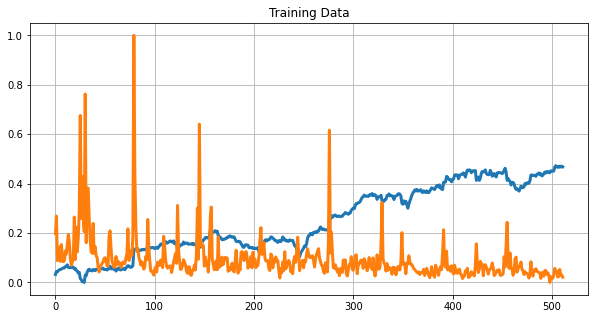

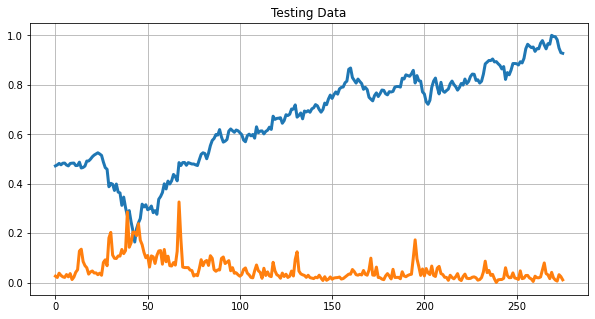

In [56]:

# Define a data plotting function

def show_plot(data, title):
  plt.figure(figsize = (10, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()
show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')


In [57]:
#Ridge Linear model 
from sklearn.linear_model import Ridge
# Note that Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model

regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [58]:
# Test the model and calculate its accuracy 
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9315757224330568


In [59]:
# Make Prediction
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.0503788 ],
       [0.05789129],
       [0.06557359],
       [0.06806291],
       [0.0706409 ],
       [0.07416737],
       [0.07245422],
       [0.07744922],
       [0.07969735],
       [0.07950096],
       [0.0825443 ],
       [0.08518623],
       [0.08765993],
       [0.07606448],
       [0.07670573],
       [0.08041066],
       [0.08499248],
       [0.08176079],
       [0.08249593],
       [0.06709758],
       [0.07748203],
       [0.06405776],
       [0.06691081],
       [0.05625771],
       [0.05371057],
       [0.01233952],
       [0.02876946],
       [0.01310011],
       [0.02036391],
       [0.02131907],
       [0.02019858],
       [0.04786529],
       [0.049948  ],
       [0.05818107],
       [0.06651562],
       [0.06607102],
       [0.06976491],
       [0.06737662],
       [0.0663655 ],
       [0.07185389],
       [0.06699602],
       [0.07343805],
       [0.07393476],
       [0.07430187],
       [0.07669562],
       [0.07691744],
       [0.0769098 ],
       [0.077

In [60]:
# Append the predicted values into a list
Predicted = []
for i in predicted_prices:
  Predicted.append(i[0])

In [61]:
len(Predicted)

788

In [62]:
# Append the close values to the list

close = []
for i in price_volume_target_scaled_df:
  close.append(i[0])


In [63]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = price_volume_target_df[['Date']]
df_predicted

,Date
0,2018-01-02
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
...,...
783,2021-02-11
784,2021-02-12
785,2021-02-16
786,2021-02-17


In [64]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

,Date,Close
0,2018-01-02,0.032036
1,2018-01-03,0.044390
2,2018-01-04,0.042935
3,2018-01-05,0.048077
4,2018-01-08,0.051680
...,...,...
783,2021-02-11,0.994319
784,2021-02-12,0.982458
785,2021-02-16,0.948821
786,2021-02-17,0.929962


In [65]:
# Add the predicted values to the dataframe
df_predicted['Prediction'] = Predicted
df_predicted

,Date,Close,Prediction
0,2018-01-02,0.032036,0.050379
1,2018-01-03,0.044390,0.057891
2,2018-01-04,0.042935,0.065574
3,2018-01-05,0.048077,0.068063
4,2018-01-08,0.051680,0.070641
...,...,...,...
783,2021-02-11,0.994319,0.920339
784,2021-02-12,0.982458,0.909939
785,2021-02-16,0.948821,0.878563
786,2021-02-17,0.929962,0.862082


In [66]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")

In [69]:
#TRAIN AN LSTM TIME SERIES MODEL
# Let's test the functions and get individual stock prices and volumes for AAPL
price_volume_df = individual_stock(stock_price_df, stock_vol_df, 'CMG')
price_volume_df

,Date,Close,Volume
0,2018-01-02,292.950012,1463600.0
1,2018-01-03,309.000000,1957400.0
2,2018-01-04,307.109985,703300.0
3,2018-01-05,313.790009,997800.0
4,2018-01-08,318.470001,1087700.0
...,...,...,...
784,2021-02-12,1527.699951,139100.0
785,2021-02-16,1484.000000,319200.0
786,2021-02-17,1459.500000,265300.0
787,2021-02-18,1456.310059,174200.0


In [70]:
# Get the close and volume data as training data (Input)
training_data = price_volume_df.iloc[:, 1:3].values
training_data

array([[2.92950012e+02, 1.46360000e+06],
       [3.09000000e+02, 1.95740000e+06],
       [3.07109985e+02, 7.03300000e+05],
       ...,
       [1.45950000e+03, 2.65300000e+05],
       [1.45631006e+03, 1.74200000e+05],
       [1.47308997e+03, 2.44100000e+05]])

In [71]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)


In [72]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [73]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [74]:
# Split the data
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [75]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape


((551, 1, 1), (237, 1, 1))

In [76]:
# Create the model
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 150)            91200     
_________________________________________________________________
dropout (Dropout)            (None, 1, 150)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 150)            180600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense (Dense)                (None, 1)                 151   

In [77]:
# Train the model
history = model.fit(
    X_train, y_train,epochs = 20, batch_size = 32,
    validation_split = 0.2)

Epoch 1/20
14/14 [==============================] - 7s 105ms/step - loss: 0.0527 - val_loss: 0.0960
Epoch 2/20
14/14 [==============================] - 0s 14ms/step - loss: 0.0173 - val_loss: 0.0109
Epoch 3/20
14/14 [==============================] - 0s 16ms/step - loss: 0.0120 - val_loss: 0.0368
Epoch 4/20
14/14 [==============================] - 0s 16ms/step - loss: 0.0095 - val_loss: 0.0115
Epoch 5/20
14/14 [==============================] - 0s 16ms/step - loss: 0.0056 - val_loss: 0.0047
Epoch 6/20
14/14 [==============================] - 0s 16ms/step - loss: 0.0015 - val_loss: 2.1164e-04
Epoch 7/20
14/14 [==============================] - 0s 15ms/step - loss: 4.3991e-04 - val_loss: 4.8732e-04
Epoch 8/20
14/14 [==============================] - 0s 16ms/step - loss: 4.6657e-04 - val_loss: 2.1907e-04
Epoch 9/20
14/14 [==============================] - 0s 15ms/step - loss: 3.8234e-04 - val_loss: 2.2356e-04
Epoch 10/20
14/14 [==============================] - 0s 16ms/step - loss: 3.3259

In [87]:
# Make prediction
predicted = model.predict(X)


In [79]:
print(type(predicted[0][0]))

<class 'numpy.float32'>


In [80]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
  test_predicted.append([i][0][0])

In [81]:
df_predicted = price_volume_df[1:][['Date']]


,Date
1,2018-01-03
2,2018-01-04
3,2018-01-05
4,2018-01-08
5,2018-01-09
...,...
784,2021-02-12
785,2021-02-16
786,2021-02-17
787,2021-02-18


In [86]:
df_predicted['predictions'] = test_predicted
df_predicted

,Date,predictions,Close
1,2018-01-03,0.040502,0.044390
2,2018-01-04,0.051999,0.042935
3,2018-01-05,0.050643,0.048077
4,2018-01-08,0.055440,0.051680
5,2018-01-09,0.058805,0.052372
...,...,...,...
784,2021-02-12,1.050235,0.982458
785,2021-02-16,1.036846,0.948821
786,2021-02-17,0.998933,0.929962
787,2021-02-18,0.977716,0.927507


In [83]:
# Plot the data
close = []
for i in training_set_scaled:
  close.append(i[0])

In [84]:
df_predicted['Close'] = close[1:]

In [85]:
# Plot the results
interactive_plot(df_predicted, "Original Vs. Prediction")